# TRAFFIC PREDICTION DATASET

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#for evaluation
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")


Loading Datasets

In [2]:
data = pd.read_csv('Traffic.csv')

In [3]:
data

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [4]:
data.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [6]:
data.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


In this above table, especially the significant differences between the maximum values and the 75th percentiles for several columns, it is reasonable to conclude that there are outliers in the data. The presence of outliers is further supported by the high standard deviations relative to the means.
Box plots are particularly useful for visualizing the distribution of data and identifying outliers.

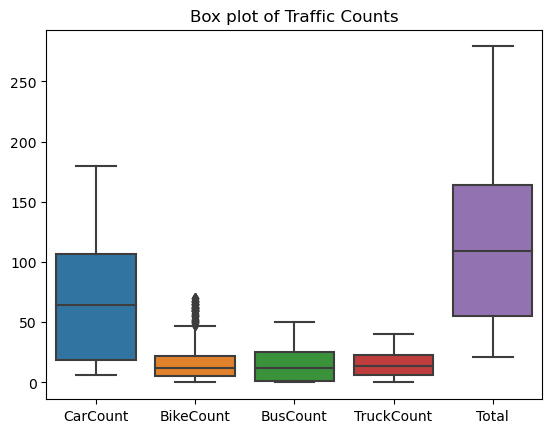

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data[['CarCount','BikeCount','BusCount','TruckCount','Total']])
plt.title('Box plot of Traffic Counts')
plt.show()

* The CarCount and the Total categories have a relatively large range of values as indicated by the length of their boxes and whiskers.
* The BikeCount categories has a very small range of values with most data points clustered around zero.
* The BusCount and TruckCount categories have a moderate range of values with some variation in ther counts.
* The Total category has a large range of values which is expected since it is the sum of all other categories.

In [8]:
data.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [9]:
data.duplicated().sum()

0

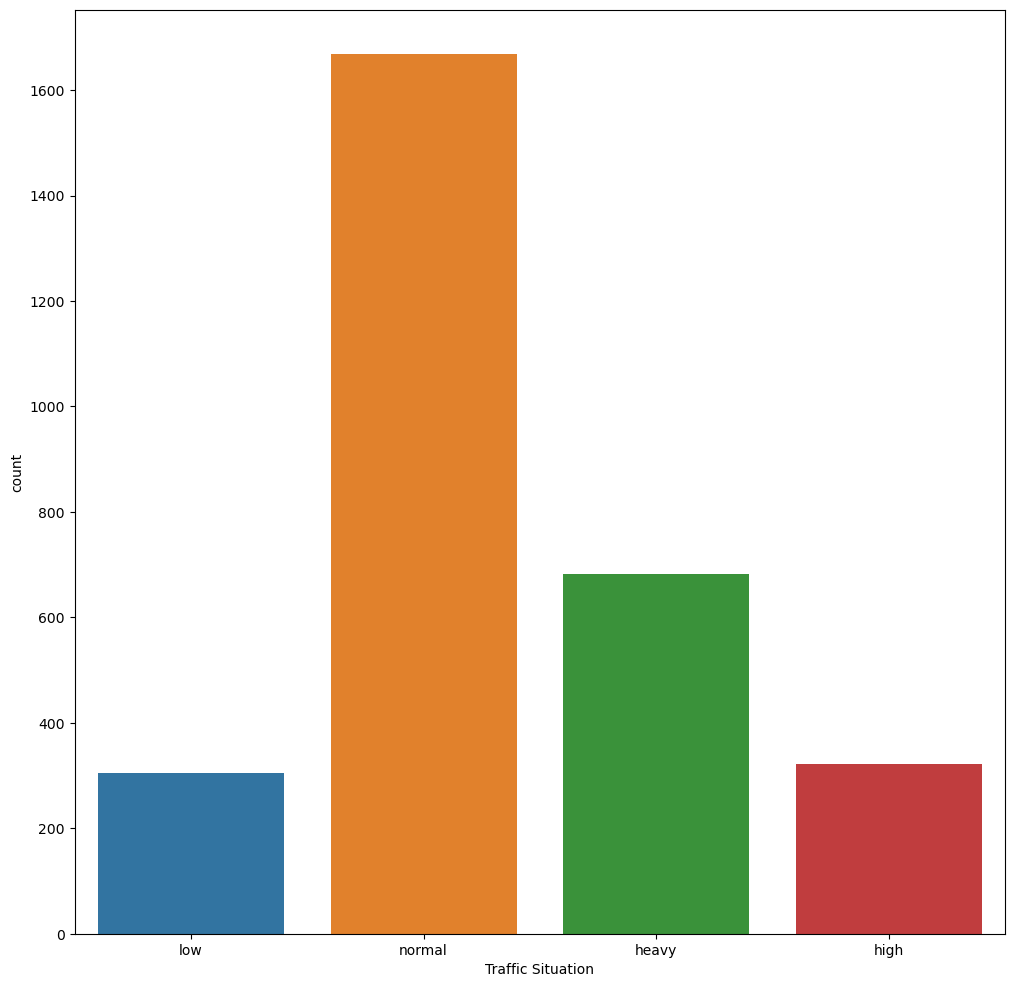

In [10]:
plt.figure(figsize=(12,12))
sns.countplot(data=data,x='Traffic Situation')
plt.show()

In [11]:
data.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

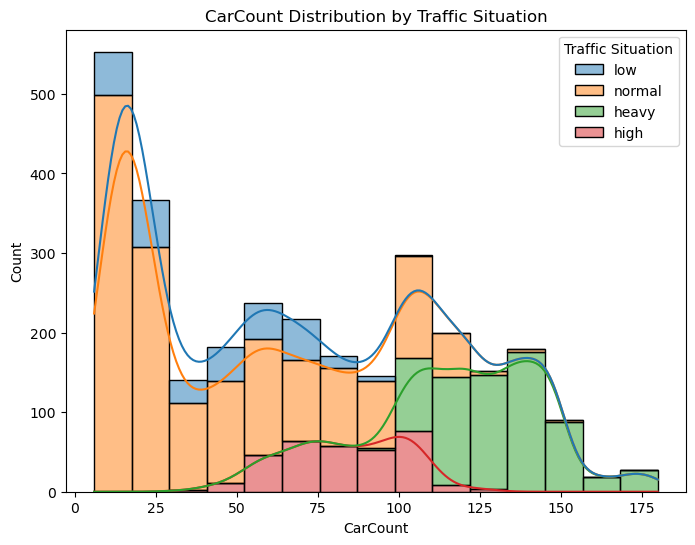

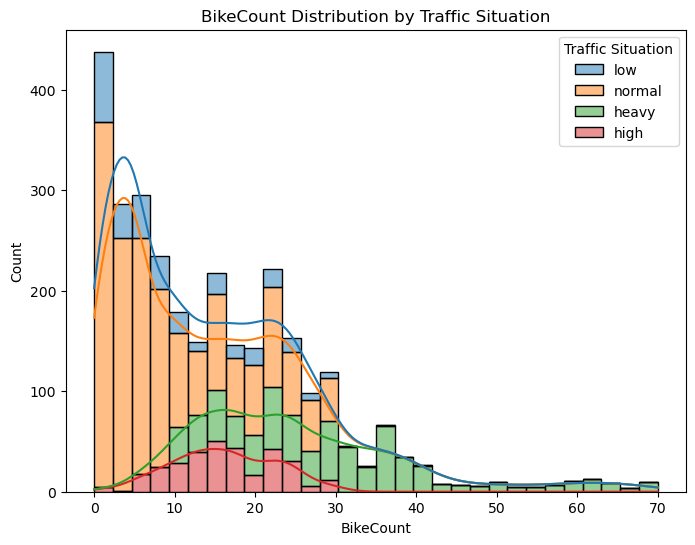

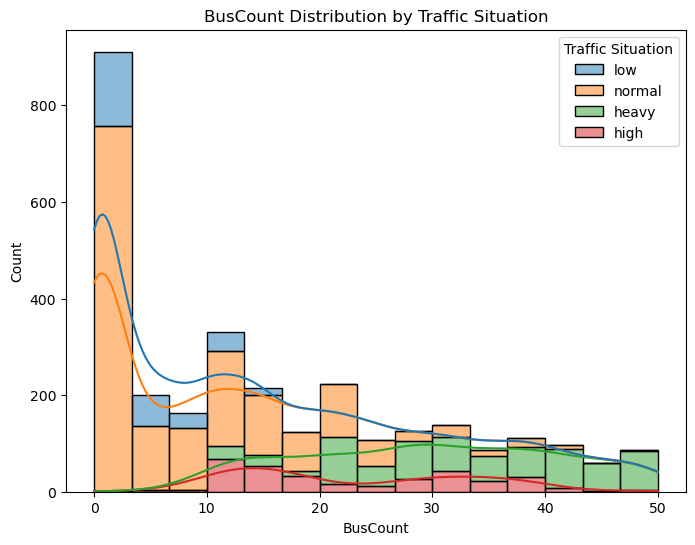

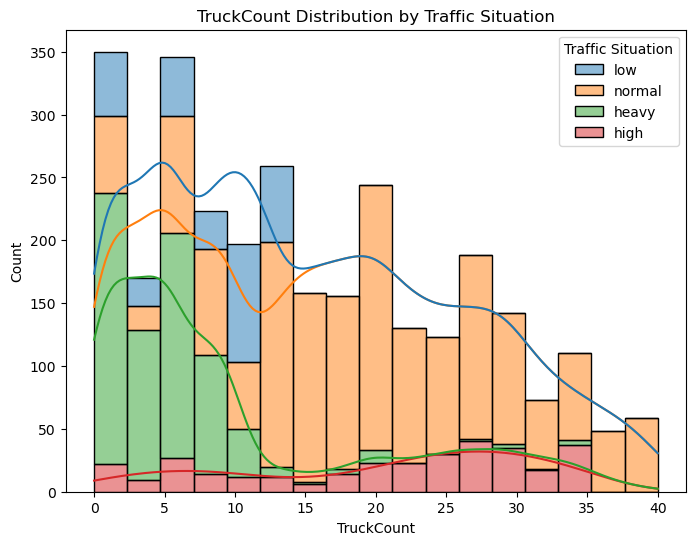

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
vehicle_columns=['CarCount','BikeCount','BusCount','TruckCount']

for vehicle in vehicle_columns:
    plt.figure(figsize=(8,6))
    sns.histplot(data=data, x=vehicle, hue='Traffic Situation', kde=True, multiple='stack')
    plt.title(f'{vehicle} Distribution by Traffic Situation')
    plt.show()

In [13]:
x=data.drop(['Time','Traffic Situation'],axis=1)
y=data['Traffic Situation']

In [14]:
x.head()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total
0,10,Tuesday,31,0,4,4,39
1,10,Tuesday,49,0,3,3,55
2,10,Tuesday,46,0,3,6,55
3,10,Tuesday,51,0,2,5,58
4,10,Tuesday,57,6,15,16,94


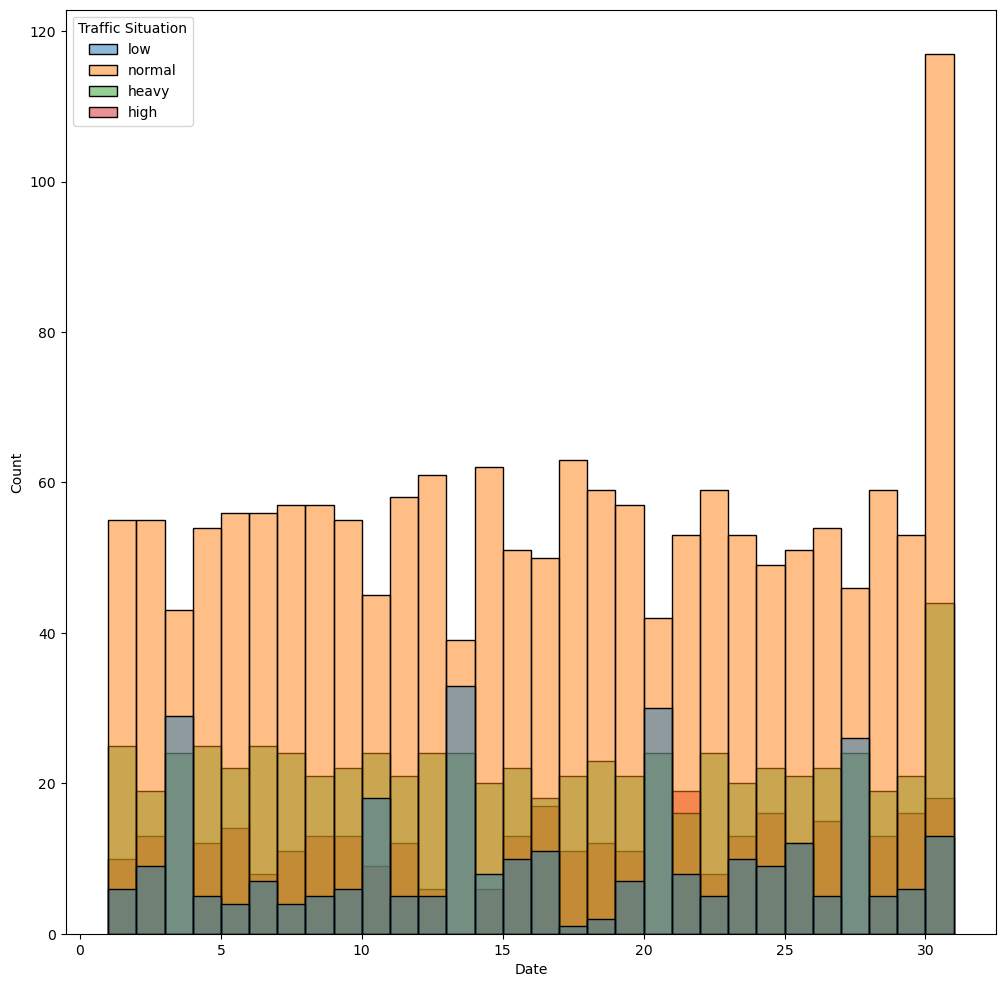

In [15]:
plt.figure(figsize=(12,12))
sns.histplot(data=data,x='Date',hue='Traffic Situation',bins=30)
plt.show()

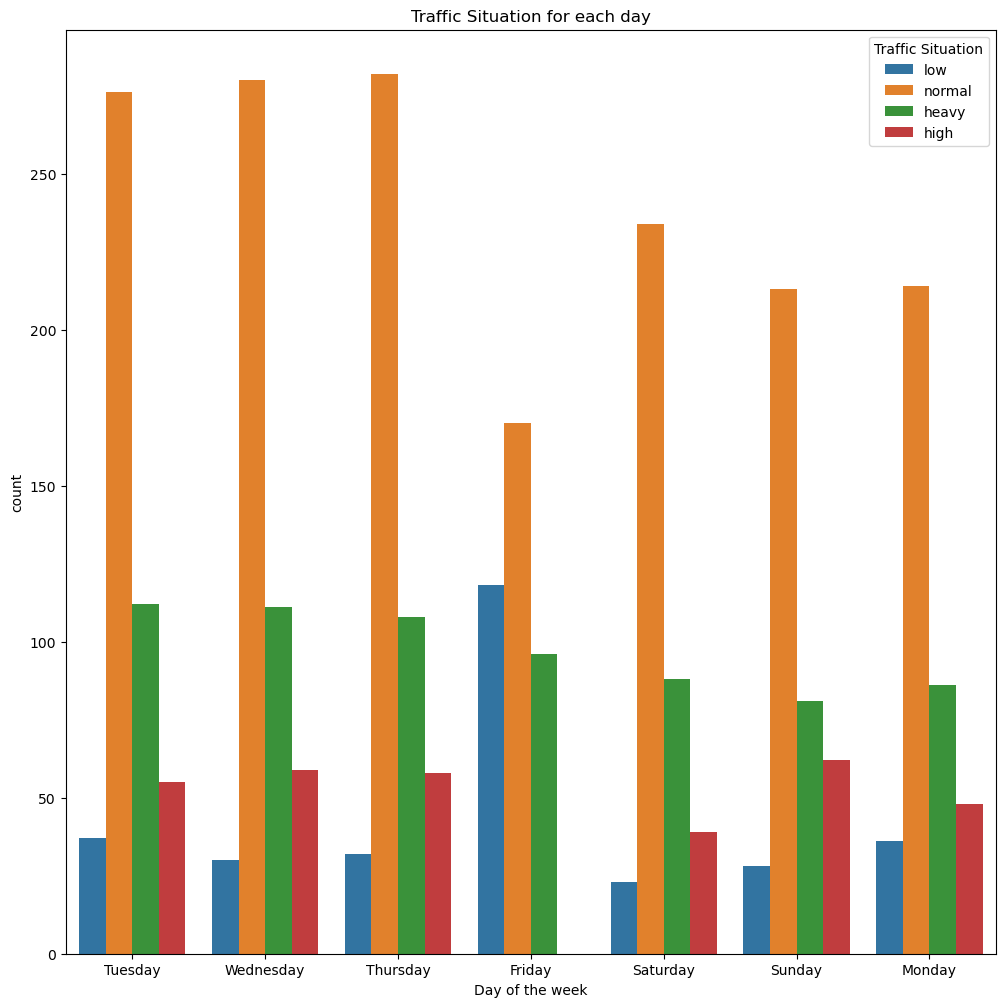

In [16]:
plt.figure(figsize=(12,12))
sns.countplot(data=data,x='Day of the week',hue='Traffic Situation')
plt.title("Traffic Situation for each day")
plt.show()

In [17]:
le=LabelEncoder()
for col in x.select_dtypes('object').columns:
    x[col]=le.fit_transform(x[col])

In [18]:
x.head()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total
0,10,5,31,0,4,4,39
1,10,5,49,0,3,3,55
2,10,5,46,0,3,6,55
3,10,5,51,0,2,5,58
4,10,5,57,6,15,16,94


In [19]:
y=le.fit_transform(y)
y

array([2, 2, 2, ..., 3, 3, 3])

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=20,test_size=0.2)

In [21]:
models = {
    'Linear_Regression':LinearRegression(), 
    'DecisionTree':DecisionTreeRegressor(),
    'RandomForest':RandomForestRegressor()
}

In [22]:
results = {'Model': [],'Accuracy': [],'Precision': [],'Recall': [],'F1-Score': []}

for i in models:
    obj = models[i]
    obj.fit(x_train, y_train)
    obj_pred = obj.predict(x_test)
    
    accuracy = accuracy_score(y_test,obj_pred>0.5)
    precision = precision_score(y_test, obj_pred>0,average='weighted')
    recall = recall_score(y_test,obj_pred>0.5,average='weighted')
    f1 = f1_score(y_test,obj_pred>0.5,average='weighted')
    
    results['Model'].append(i)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)
    
results_data = pd.DataFrame(results)

print(results_data)

               Model  Accuracy  Precision    Recall  F1-Score
0  Linear_Regression  0.206376   0.230331  0.206376  0.152884
1       DecisionTree  0.333893   0.234048  0.333893  0.247063
2       RandomForest  0.333893   0.234010  0.333893  0.247063
